# data split
strategy:
- train/test = 8/2
- remove redundant proteins (only save the representatives of clusters)

# split strategy 1: split by sequence cluster representatives

## read the global cluster file

In [ ]:
cluster_dict = {}

with open('/Users/yanyz/data/TOUGH-M1/scripts/data/clusterRes_all_seq_global_cluster.tsv', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line_list = line.strip().split()  # Print each line without newline character
        representative = line_list[0].split("_")[0]
        member = line_list[1].split("_")[0]
        
        # If the representative is not already a key, initialize with an empty list
        if representative not in cluster_dict:
            cluster_dict[representative] = []
        
        # Append the member to the representative's list
        cluster_dict[representative].append(member)

# Print the cluster dictionary
for representative, member in cluster_dict.items():
    print(f"{representative}: {member}")

2bexB:B: ['2bexB:B']
2x2eB:B: ['2x2eB:B', '4h1uA:A', '3t35B:B']
3bwcB:B: ['3bwcB:B']
4xhcA:A: ['4xhcA:A']
1b25C:C: ['1b25C:C']
1dj2B:B: ['1dj2B:B', '1dj3B:B']
4ohnA:A: ['4ohnA:A']
1e9aA:A: ['1e9aA:A']
2gj3B:B: ['2gj3B:B']
3awnA:A: ['3awnA:A']
2bz9A:A: ['2bz9A:A']
4ha9A:A: ['4ha9A:A']
1i0rA:A: ['1i0rA:A']
4w89B:B: ['4w89B:B']
3gq1A:A: ['3gq1A:A', '2w9rA:A']
3b1fA:A: ['3b1fA:A']
4a6jA:A: ['4a6jA:A']
3ivqA:A: ['3ivqA:A']
1p3vA:A: ['1p3vA:A']
5jqwA:A: ['5jqwA:A']
3otgA:A: ['3otgA:A']
5eogA:A: ['5eogA:A']
2gkeA:A: ['2gkeA:A']
3fzpA:A: ['3fzpA:A', '2ijmB:B']
2cjpB:B: ['2cjpB:B']
4dlcA:A: ['4dlcA:A', '1ogkC:C', '2yb0D:D']
2d1yC:C: ['2d1yC:C']
2df8A:A: ['2df8A:A']
1m01A:A: ['1m01A:A']
4ij8A:A: ['4ij8A:A']
4kvzA:A: ['4kvzA:A']
3uhoA:A: ['3uhoA:A', '2jfyB:B']
1wnuB:B: ['1wnuB:B']
2wf6A:A: ['2wf6A:A']
2r4pA:A: ['2r4pA:A']
3g1qD:D: ['3g1qD:D']
1z03E:E: ['1z03E:E']
2jeqA:A: ['2jeqA:A']
1mskA:A: ['1mskA:A']
4wv3A:A: ['4wv3A:A']
5c6vC:C: ['5c6vC:C']
4qkdB:B: ['4qkdB:B']
2oyrA:A: ['2oyrA:A']
2xq0A:A: 

In [ ]:
representatives = [k.split(":")[0] for k in cluster_dict.keys()]
print('number of representatives: ', len(representatives))
representatives

number of representatives:  6078


['2bexB',
 '2x2eB',
 '3bwcB',
 '4xhcA',
 '1b25C',
 '1dj2B',
 '4ohnA',
 '1e9aA',
 '2gj3B',
 '3awnA',
 '2bz9A',
 '4ha9A',
 '1i0rA',
 '4w89B',
 '3gq1A',
 '3b1fA',
 '4a6jA',
 '3ivqA',
 '1p3vA',
 '5jqwA',
 '3otgA',
 '5eogA',
 '2gkeA',
 '3fzpA',
 '2cjpB',
 '4dlcA',
 '2d1yC',
 '2df8A',
 '1m01A',
 '4ij8A',
 '4kvzA',
 '3uhoA',
 '1wnuB',
 '2wf6A',
 '2r4pA',
 '3g1qD',
 '1z03E',
 '2jeqA',
 '1mskA',
 '4wv3A',
 '5c6vC',
 '4qkdB',
 '2oyrA',
 '2xq0A',
 '2okcA',
 '3nmxB',
 '1y81A',
 '1sy7B',
 '1fm7B',
 '2yzqA',
 '3dcbA',
 '1o91C',
 '4d9nB',
 '5c03B',
 '4wgxC',
 '3o6dA',
 '5efqA',
 '1pl8D',
 '2vryA',
 '3bwlA',
 '5agdB',
 '1n1eB',
 '3hf7A',
 '2pupB',
 '1n8pD',
 '1ghpA',
 '3pmdA',
 '1gxbC',
 '5ckwA',
 '3r6uA',
 '2q3mA',
 '4j8gA',
 '3zo7F',
 '4eikA',
 '4a1zB',
 '4gyoA',
 '3tmgA',
 '1ejeA',
 '3u3dA',
 '5ab7D',
 '1hriA',
 '2bnnA',
 '5hguA',
 '2yx1B',
 '3krbA',
 '5duaA',
 '1w9wA',
 '3x0oA',
 '4uroB',
 '5corJ',
 '1ux8A',
 '2o0hA',
 '4wqlA',
 '3uk6E',
 '2wl9B',
 '4ctsA',
 '4r38C',
 '3k4hA',
 '4j1qA',
 '2gduA',


## split the representatives by 8/2

In [ ]:
# randomly split more_than_one into two groups by keys with a ratio of 0.8:0.2
import random
random.seed(42)  # For reproducibility
random.shuffle(representatives)  
split_index = int(len(representatives) * 0.8)
representatives_train = representatives[:split_index]
representatives_test = representatives[split_index:]

print("Training set size:", len(representatives_train))
print("Testing set size:", len(representatives_test))

Training set size: 4862
Testing set size: 1216


## load positive and negative list

In [ ]:
import pandas as pd

colnames=['pdb1', 'pdb2', 'seq_id_prot', 'tm-score_prot', 'tanimoto_coefficient_lig'] 
positive = pd.read_csv('/Users/yanyz/data/TOUGH-M1/TOUGH-M1_positive.list', sep=' ', header=None, names=colnames)
negative = pd.read_csv('/Users/yanyz/data/TOUGH-M1/TOUGH-M1_negative.list', sep=' ', header=None, names=colnames)
positive['label'] = 1
negative['label'] = 0
positive

,pdb1,pdb2,seq_id_prot,tm-score_prot,tanimoto_coefficient_lig,label
0,1lkxD,2qenA,0.202,0.33914,1.000000,1
1,1lkxD,3zl8A,0.191,0.31224,1.000000,1
2,1lkxD,4dz6A,0.203,0.33353,1.000000,1
3,1lkxD,2j9dJ,0.216,0.37152,1.000000,1
4,1lkxD,4yj1A,0.151,0.27935,1.000000,1
...,...,...,...,...,...,...
505111,1gaxD,3ruxA,0.182,0.32836,0.700000,1
505112,4yrdA,2y9xA,0.209,0.26290,0.750000,1
505113,4g4jA,1h41B,0.203,0.35601,0.812500,1
505114,2yktA,1p7wA,0.131,0.21868,0.714286,1


## clean the data 
only save data points that both pdb1 and pdb2 are representatives

In [ ]:
positive_clean = positive[positive['pdb1'].isin(representatives) & positive['pdb2'].isin(representatives)]
negative_clean = negative[negative['pdb1'].isin(representatives) & negative['pdb2'].isin(representatives)]
print('number of clean positive: ', positive_clean.shape[0])
print('number of clean negative: ', negative_clean.shape[0])

number of clean positive:  301167
number of clean negative:  357138


In [ ]:
positive_train = positive_clean[positive_clean['pdb1'].isin(representatives_train) & positive_clean['pdb2'].isin(representatives_train)]
positive_test = positive_clean[positive_clean['pdb1'].isin(representatives_test) & positive_clean['pdb2'].isin(representatives_test)]
negative_train = negative_clean[negative_clean['pdb1'].isin(representatives_train) & negative_clean['pdb2'].isin(representatives_train)]
negative_test = negative_clean[negative_clean['pdb1'].isin(representatives_test) & negative_clean['pdb2'].isin(representatives_test)]
print('number of clean positive train: ', positive_train.shape[0])
print('number of clean positive test: ', positive_test.shape[0])
print('number of total positive: ', positive_train.shape[0] + positive_test.shape[0])
print('\n')
print('number of clean negative train: ', negative_train.shape[0])
print('number of clean negative test: ', negative_test.shape[0])
print('number of total negative: ', negative_train.shape[0] + negative_test.shape[0])

number of clean positive train:  194425
number of clean positive test:  11708
number of total positive:  206133


number of clean negative train:  233489
number of clean negative test:  12999
number of total negative:  246488


In [ ]:
# save the dataframes to csv
positive_train.to_csv('/Users/yanyz/data/TOUGH-M1/scripts/data/positive_train.csv', index=False)
positive_test.to_csv('/Users/yanyz/data/TOUGH-M1/scripts/data/positive_test.csv', index=False)
negative_train.to_csv('/Users/yanyz/data/TOUGH-M1/scripts/data/negative_train.csv', index=False)
negative_test.to_csv('/Users/yanyz/data/TOUGH-M1/scripts/data/negative_test.csv', index=False)

# split strategy 2: take all the data, but put clusters only in training set

In [1]:
cluster_dict = {}

with open('/Users/yanyz/data/TOUGH-M1/scripts/data/clusterRes_all_seq_global_cluster.tsv', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line_list = line.strip().split()  # Print each line without newline character
        representative = line_list[0].split("_")[0]
        member = line_list[1].split("_")[0]
        
        # If the representative is not already a key, initialize with an empty list
        if representative not in cluster_dict:
            cluster_dict[representative] = []
        
        # Append the member to the representative's list
        cluster_dict[representative].append(member)

# Print the cluster dictionary
for representative, member in cluster_dict.items():
    print(f"{representative}: {member}")

2bexB:B: ['2bexB:B']
2x2eB:B: ['2x2eB:B', '4h1uA:A', '3t35B:B']
3bwcB:B: ['3bwcB:B']
4xhcA:A: ['4xhcA:A']
1b25C:C: ['1b25C:C']
1dj2B:B: ['1dj2B:B', '1dj3B:B']
4ohnA:A: ['4ohnA:A']
1e9aA:A: ['1e9aA:A']
2gj3B:B: ['2gj3B:B']
3awnA:A: ['3awnA:A']
2bz9A:A: ['2bz9A:A']
4ha9A:A: ['4ha9A:A']
1i0rA:A: ['1i0rA:A']
4w89B:B: ['4w89B:B']
3gq1A:A: ['3gq1A:A', '2w9rA:A']
3b1fA:A: ['3b1fA:A']
4a6jA:A: ['4a6jA:A']
3ivqA:A: ['3ivqA:A']
1p3vA:A: ['1p3vA:A']
5jqwA:A: ['5jqwA:A']
3otgA:A: ['3otgA:A']
5eogA:A: ['5eogA:A']
2gkeA:A: ['2gkeA:A']
3fzpA:A: ['3fzpA:A', '2ijmB:B']
2cjpB:B: ['2cjpB:B']
4dlcA:A: ['4dlcA:A', '1ogkC:C', '2yb0D:D']
2d1yC:C: ['2d1yC:C']
2df8A:A: ['2df8A:A']
1m01A:A: ['1m01A:A']
4ij8A:A: ['4ij8A:A']
4kvzA:A: ['4kvzA:A']
3uhoA:A: ['3uhoA:A', '2jfyB:B']
1wnuB:B: ['1wnuB:B']
2wf6A:A: ['2wf6A:A']
2r4pA:A: ['2r4pA:A']
3g1qD:D: ['3g1qD:D']
1z03E:E: ['1z03E:E']
2jeqA:A: ['2jeqA:A']
1mskA:A: ['1mskA:A']
4wv3A:A: ['4wv3A:A']
5c6vC:C: ['5c6vC:C']
4qkdB:B: ['4qkdB:B']
2oyrA:A: ['2oyrA:A']
2xq0A:A: 

In [2]:
# Find the key with more than 1 members
more_than_one = {k: v for k, v in cluster_dict.items() if len(v) > 1}
print(f"Representatives with more than 1 members: {more_than_one.keys()}")
print(f"Number of representatives with more than 1 members: {len(more_than_one)}")

Representatives with more than 1 members: dict_keys(['2x2eB:B', '1dj2B:B', '3gq1A:A', '3fzpA:A', '4dlcA:A', '3uhoA:A', '3r6uA:A', '4a1zB:B', '2yx1B:B', '1ux8A:A', '3uk6E:E', '2wl9B:B', '3r3eA:A', '1uxxA:A', '4jalB:B', '4fl9A:A', '1lhtA:A', '4b8nB:B', '4ns1A:A', '4fsxB:B', '3bfkA:A', '2euhA:A', '3lmkB:B', '3omfA:A', '5dbfB:B', '3f6sF:F', '4hp8B:B', '2o1xA:A', '5cgxA:A', '2w12A:A', '4fl0A:A', '1o8bB:B', '3zt5C:C', '3n0sA:A', '5fbsA:A', '1oijC:C', '4qbtA:A', '1uayA:A', '2qa9A:A', '4phlA:A', '5dozC:C', '3c3xA:A', '2q2qC:C', '2zetA:A', '1spgA:A', '3pplA:A', '4jd6C:C', '2vtzC:C', '3msdB:B', '4l1kA:A', '3pcnF:F', '2fsoA:A', '4nbuA:A', '4s1oB:B', '5e6oB:B', '3sjuB:B', '1tyzA:A', '5hzxB:B', '2yiuE:E', '2v40A:A', '2qz4A:A', '2asnA:A', '2z23A:A', '4b4dA:A', '5ck4A:A', '4k2sB:B', '3b00D:D', '2j3iB:B', '4jrgB:B', '4jl0B:B', '3o18A:A', '4tptA:A', '4cgwB:B', '4rquB:B', '3ty2B:B', '2fapA:A', '2qetA:A', '1f9aE:E', '4gmuA:A', '1i8pA:A', '4h8pA:A', '2db3E:E', '2fr8A:A', '4o48B:B', '2e40A:A', '3looA:A', '

In [3]:
# flatten the dictionary
def flatten_dict(d):
    """Flatten a dictionary of lists into a single list with unique value."""
    output = []
    for key, sublist in d.items():
        output.append(key)
        for item in sublist:
            output.append(item)
    return list(set(output))

# Example usage
my_dict = {"a": [1, 2, 3], "b": [11, 2, 3], "c": [3]}
flatten_dict(my_dict)

[1, 2, 3, 'b', 11, 'c', 'a']

In [4]:
more_than_one_list = flatten_dict(more_than_one)
more_than_one_list = {i.split(":")[0] for i in more_than_one_list}
print(f"Number of unique proteins in more_than_one set: {len(more_than_one_list)}")
print(more_than_one_list)

Number of unique proteins in more_than_one set: 2292
{'2xdlA', '3gyxC', '3ppuA', '2yk1A', '2z5fA', '2vjrA', '2j59B', '1jcgA', '3at6B', '1ci3A', '3sjuB', '4mh2G', '2g9uA', '4xmcA', '1lo3B', '4yahA', '1be2A', '1cfmA', '4mfkA', '3kkoB', '4jeyA', '2jj9A', '4wgjA', '5e84B', '4oa4A', '2ns8D', '1c1jB', '2a1uA', '1yhuJ', '5ce4A', '5a65B', '3hyuB', '1oatB', '4zacB', '1bibA', '4d76A', '1f8iC', '4xx0A', '2zdoA', '1vrwA', '1cgzA', '2qicA', '1fboA', '2v55B', '4we3D', '3cosA', '3spfA', '4oniA', '3evaA', '4gaaB', '2d1fA', '5fmgI', '4a1zB', '4wj4A', '4j5dA', '4klzA', '4jq6A', '4nufA', '2g2zA', '1c1lA', '2wgsA', '1lvbA', '3gqlB', '4mitD', '3pefC', '4hrrA', '1dg1A', '2e4vA', '4usqB', '4xl4B', '1zrhA', '3bpwB', '2rkgA', '1ixsB', '1kglA', '3sikB', '4y3bB', '3r1rC', '2xx2D', '1gljA', '1b4kA', '3t0iA', '1gjpA', '2zs1C', '3kkzA', '3khjF', '3kfhA', '1spgB', '3bfkA', '2cfeA', '3f8wC', '1z0nA', '1a05B', '1dr5A', '1ev1A', '2zfaB', '4kg5D', '3tptB', '4hs6E', '5fbsA', '4qu3A', '1ltkB', '4oj9A', '4ng4B', '3ubmC', '

In [5]:
import pandas as pd

colnames=['pdb1', 'pdb2', 'seq_id_prot', 'tm-score_prot', 'tanimoto_coefficient_lig'] 
positive = pd.read_csv('/Users/yanyz/data/TOUGH-M1/TOUGH-M1_positive.list', sep=' ', header=None, names=colnames)
negative = pd.read_csv('/Users/yanyz/data/TOUGH-M1/TOUGH-M1_negative.list', sep=' ', header=None, names=colnames)
positive['label'] = 1
negative['label'] = 0
positive


positive_more_than_one = positive[positive['pdb1'].isin(more_than_one_list) | positive['pdb2'].isin(more_than_one_list)]
negative_more_than_one = negative[negative['pdb1'].isin(more_than_one_list) | negative['pdb2'].isin(more_than_one_list)]
print('number of more_than_one positive: ', positive_more_than_one.shape[0])
print('number of more_than_one negative: ', negative_more_than_one.shape[0])

number of more_than_one positive:  291428
number of more_than_one negative:  292644


In [ ]:
negative_more_than_one

,pdb1,pdb2,seq_id_prot,tm-score_prot,tanimoto_coefficient_lig,label
3,1lkxD,3kvaA,0.165,0.31301,0.027778,0
4,1lkxD,4m1rB,0.194,0.37976,0.029412,0
7,1lkxD,4gmeB,0.212,0.29633,0.025641,0
12,1lkxD,1i1qA,0.199,0.29280,0.166667,0
13,1lkxD,2iwzB,0.171,0.31240,0.030303,0
...,...,...,...,...,...,...
556804,4rwaB,4qqcA,0.208,0.29708,0.090909,0
556805,4rwaB,2vu9A,0.185,0.26473,0.070312,0
556807,4qqcA,2vu9A,0.168,0.32373,0.080000,0
556808,4qqcA,1w9xA,0.202,0.31928,0.050725,0


In [ ]:
positive_remaining = positive.drop(positive_more_than_one.index)
negative_remaining = negative.drop(negative_more_than_one.index)
positive_remaining

,pdb1,pdb2,seq_id_prot,tm-score_prot,tanimoto_coefficient_lig,label
0,1lkxD,2qenA,0.202,0.33914,1.000000,1
1,1lkxD,3zl8A,0.191,0.31224,1.000000,1
2,1lkxD,4dz6A,0.203,0.33353,1.000000,1
4,1lkxD,4yj1A,0.151,0.27935,1.000000,1
5,1lkxD,4dcaA,0.252,0.33821,1.000000,1
...,...,...,...,...,...,...
505111,1gaxD,3ruxA,0.182,0.32836,0.700000,1
505112,4yrdA,2y9xA,0.209,0.26290,0.750000,1
505113,4g4jA,1h41B,0.203,0.35601,0.812500,1
505114,2yktA,1p7wA,0.131,0.21868,0.714286,1


In [ ]:
# split the remaining data into train and test by 6/4
positive_remaining_train = positive_remaining.sample(frac=0.5, random_state=42)
positive_remaining_test = positive_remaining.drop(positive_remaining_train.index)
negative_remaining_train = negative_remaining.sample(frac=0.5, random_state=42)
negative_remaining_test = negative_remaining.drop(negative_remaining_train.index)
print('number of remaining positive train: ', positive_remaining_train.shape[0])
print('number of remaining positive test: ', positive_remaining_test.shape[0])
print('number of remaining negative train: ', negative_remaining_train.shape[0])
print('number of remaining negative test: ', negative_remaining_test.shape[0])


number of remaining positive train:  106844
number of remaining positive test:  106844
number of remaining negative train:  132083
number of remaining negative test:  132083


In [ ]:
train = pd.concat([positive_more_than_one, positive_remaining_train, negative_more_than_one, negative_remaining_train], axis=0)
test = pd.concat([positive_remaining_test, negative_remaining_test], axis=0)
print('number of train: ', train.shape[0])
print('number of test: ', test.shape[0])

number of train:  822999
number of test:  238927


In [ ]:
train

,pdb1,pdb2,seq_id_prot,tm-score_prot,tanimoto_coefficient_lig,label
3,1lkxD,2j9dJ,0.216,0.37152,1.000000,1
6,1lkxD,3ge1B,0.206,0.30251,1.000000,1
8,1lkxD,2c9oB,0.205,0.31012,1.000000,1
11,1lkxD,4ww0A,0.202,0.31382,1.000000,1
14,1lkxD,5afuM,0.204,0.33120,1.000000,1
...,...,...,...,...,...,...
63717,4nduA,3f70A,0.202,0.34112,0.095238,0
261589,4m1cA,2h9vA,0.178,0.32803,0.142857,0
516171,1rxzA,4s1pA,0.247,0.30683,0.060000,0
116193,2fp2B,3qglI,0.147,0.31228,0.050000,0


In [ ]:
train["p1"] = train["pdb1"].str[:-1] + "_" + train["pdb1"].str[-1]
train["p2"] = train["pdb2"].str[:-1] + "_" + train["pdb2"].str[-1]
train

,pdb1,pdb2,seq_id_prot,tm-score_prot,tanimoto_coefficient_lig,label,p1,p2
3,1lkxD,2j9dJ,0.216,0.37152,1.000000,1,1lkx_D,2j9d_J
6,1lkxD,3ge1B,0.206,0.30251,1.000000,1,1lkx_D,3ge1_B
8,1lkxD,2c9oB,0.205,0.31012,1.000000,1,1lkx_D,2c9o_B
11,1lkxD,4ww0A,0.202,0.31382,1.000000,1,1lkx_D,4ww0_A
14,1lkxD,5afuM,0.204,0.33120,1.000000,1,1lkx_D,5afu_M
...,...,...,...,...,...,...,...,...
63717,4nduA,3f70A,0.202,0.34112,0.095238,0,4ndu_A,3f70_A
261589,4m1cA,2h9vA,0.178,0.32803,0.142857,0,4m1c_A,2h9v_A
516171,1rxzA,4s1pA,0.247,0.30683,0.060000,0,1rxz_A,4s1p_A
116193,2fp2B,3qglI,0.147,0.31228,0.050000,0,2fp2_B,3qgl_I


In [ ]:
test['p1'] = test['pdb1'].str[:-1] + "_" + test['pdb1'].str[-1]
test['p2'] = test['pdb2'].str[:-1] + "_" + test['pdb2'].str[-1]
test

,pdb1,pdb2,seq_id_prot,tm-score_prot,tanimoto_coefficient_lig,label,p1,p2
2,1lkxD,4dz6A,0.203,0.33353,1.000000,1,1lkx_D,4dz6_A
4,1lkxD,4yj1A,0.151,0.27935,1.000000,1,1lkx_D,4yj1_A
7,1lkxD,2fsnB,0.178,0.34318,1.000000,1,1lkx_D,2fsn_B
10,1lkxD,3a0tA,0.266,0.39683,1.000000,1,1lkx_D,3a0t_A
12,1lkxD,2bufC,0.179,0.37007,1.000000,1,1lkx_D,2buf_C
...,...,...,...,...,...,...,...,...
556779,4twjA,4rwaB,0.191,0.33335,0.130769,0,4twj_A,4rwa_B
556785,4gbaB,4rwaB,0.203,0.33975,0.115385,0,4gba_B,4rwa_B
556788,4gbaB,1w9xA,0.194,0.37086,0.012270,0,4gba_B,1w9x_A
556792,1u38A,3kvnB,0.262,0.35832,0.100000,0,1u38_A,3kvn_B


In [ ]:
# save the dataframes to csv
train[['p1', 'p2', 'label']].to_csv('/Users/yanyz/data/TOUGH-M1/scripts/data/data_split_3/training.txt', index=False)
test[['p1', 'p2', 'label']].to_csv('/Users/yanyz/data/TOUGH-M1/scripts/data/data_split_3/testing.txt', index=False)

### split train and validation


In [ ]:
import numpy as np

np.random.seed(0)
val_range = 0.1
train_df_shuffled = train.sample(frac=1).reset_index(drop=True)
val_cutoff = int(val_range * len(train_df_shuffled))
val_cutoff

82299

In [ ]:
val_rows = train_df_shuffled.iloc[:val_cutoff]
val_rows

,pdb1,pdb2,seq_id_prot,tm-score_prot,tanimoto_coefficient_lig,label,p1,p2
0,3efwB,5e7nA,0.157,0.32849,0.160714,0,3efw_B,5e7n_A
1,3gneA,1tzxA,0.179,0.32481,1.000000,1,3gne_A,1tzx_A
2,1hdgB,1y1pA,0.173,0.39979,0.877551,1,1hdg_B,1y1p_A
3,1i3sB,4x0uA,0.210,0.30089,0.105263,0,1i3s_B,4x0u_A
4,2angA,5fq0D,0.223,0.31654,1.000000,1,2ang_A,5fq0_D
...,...,...,...,...,...,...,...,...
82294,2r65A,3vn9A,0.221,0.30036,0.812500,1,2r65_A,3vn9_A
82295,4ba5A,3pkdA,0.203,0.34384,0.155556,0,4ba5_A,3pkd_A
82296,4oxiA,1n0uA,0.183,0.30850,0.107143,0,4oxi_A,1n0u_A
82297,2i5bD,4ns3E,0.179,0.39641,0.896552,1,2i5b_D,4ns3_E


In [ ]:
train_rows = train_df_shuffled.iloc[val_cutoff:]
train_rows

,pdb1,pdb2,seq_id_prot,tm-score_prot,tanimoto_coefficient_lig,label,p1,p2
82299,3vxsC,3tykA,0.190,0.27043,0.068376,0,3vxs_C,3tyk_A
82300,5dmgD,3ptyA,0.168,0.30776,0.074074,0,5dmg_D,3pty_A
82301,1fnzA,1m01A,0.249,0.34438,1.000000,1,1fnz_A,1m01_A
82302,3qbyB,2yb9A,0.245,0.37800,0.148936,0,3qby_B,2yb9_A
82303,1cgzA,5eqiA,0.198,0.33603,0.181818,0,1cgz_A,5eqi_A
...,...,...,...,...,...,...,...,...
822994,3llmB,3hbnA,0.250,0.35518,0.733333,1,3llm_B,3hbn_A
822995,1sc6B,4xzmA,0.266,0.30342,0.877551,1,1sc6_B,4xzm_A
822996,5fbsA,3c41A,0.255,0.31186,0.812500,1,5fbs_A,3c41_A
822997,3gxrB,3unfH,0.212,0.34504,0.075949,0,3gxr_B,3unf_H


## triplet
p1, p2, p3:
- p1 and p2 are similar
- p1 and p3 are dissimilar

In [ ]:
import pandas as pd
from collections import defaultdict

# Sample dataframe
# df = pd.DataFrame({
#     'p1': [...],
#     'p2': [...],
#     'label': [...]
# })

def create_triplets(df):
    # Separate positive and negative pairs
    positives = df[df['label'] == 1]
    negatives = df[df['label'] == 0]

    # Create a map from p1 to all dissimilar p3s
    negative_dict = defaultdict(set)
    for _, row in negatives.iterrows():
        negative_dict[row['p1']].add(row['p2'])

    triplets = []

    for _, row in positives.iterrows():
        p1, p2 = row['p1'], row['p2']
        if p1 in negative_dict and negative_dict[p1]:
            for p3 in negative_dict[p1]:
                triplets.append((p1, p2, p3))
    
    return triplets


In [ ]:
# Usage:
triplets_train = create_triplets(train)
triplets_train

[('1lkx_D', '2j9d_J', '2ei1_A'),
 ('1lkx_D', '2j9d_J', '1awi_B'),
 ('1lkx_D', '2j9d_J', '4zbi_A'),
 ('1lkx_D', '2j9d_J', '2p2i_B'),
 ('1lkx_D', '2j9d_J', '1pw1_A'),
 ('1lkx_D', '2j9d_J', '3sji_A'),
 ('1lkx_D', '2j9d_J', '3tte_A'),
 ('1lkx_D', '2j9d_J', '5eq9_B'),
 ('1lkx_D', '2j9d_J', '5ij7_A'),
 ('1lkx_D', '2j9d_J', '2wel_A'),
 ('1lkx_D', '2j9d_J', '3ula_B'),
 ('1lkx_D', '2j9d_J', '1z9h_B'),
 ('1lkx_D', '2j9d_J', '2eh8_A'),
 ('1lkx_D', '2j9d_J', '4x8e_B'),
 ('1lkx_D', '2j9d_J', '3uoj_A'),
 ('1lkx_D', '2j9d_J', '4lno_C'),
 ('1lkx_D', '2j9d_J', '2iph_A'),
 ('1lkx_D', '2j9d_J', '1zt4_A'),
 ('1lkx_D', '2j9d_J', '3hem_A'),
 ('1lkx_D', '2j9d_J', '1bfv_B'),
 ('1lkx_D', '2j9d_J', '1hpg_A'),
 ('1lkx_D', '2j9d_J', '3p8x_A'),
 ('1lkx_D', '2j9d_J', '3unf_H'),
 ('1lkx_D', '2j9d_J', '2q37_A'),
 ('1lkx_D', '2j9d_J', '1o3w_A'),
 ('1lkx_D', '2j9d_J', '4b0i_E'),
 ('1lkx_D', '2j9d_J', '3p37_C'),
 ('1lkx_D', '2j9d_J', '3en6_B'),
 ('1lkx_D', '2j9d_J', '5erm_B'),
 ('1lkx_D', '2j9d_J', '1u4g_A'),
 ('1lkx_D'

In [ ]:
triplets_train_df = pd.DataFrame(triplets_train)
triplets_train_df.to_csv('/Users/yanyz/data/TOUGH-M1/scripts/data/triplets/training_list.txt', index=False, header=False, sep=' ')

In [ ]:
len(triplets_train)

2237888

In [ ]:
triplets_test = create_triplets(test)
print(len(triplets_test))
triplets_test

286664


[('1lkx_D', '4dz6_A', '3o96_A'),
 ('1lkx_D', '4dz6_A', '5d4y_B'),
 ('1lkx_D', '4dz6_A', '2wnu_F'),
 ('1lkx_D', '4dz6_A', '3s21_A'),
 ('1lkx_D', '4dz6_A', '4yjs_A'),
 ('1lkx_D', '4dz6_A', '4tsz_Q'),
 ('1lkx_D', '4dz6_A', '3vmt_A'),
 ('1lkx_D', '4dz6_A', '3liv_A'),
 ('1lkx_D', '4dz6_A', '3kaa_B'),
 ('1lkx_D', '4dz6_A', '4ms4_A'),
 ('1lkx_D', '4dz6_A', '2kt4_A'),
 ('1lkx_D', '4dz6_A', '2z31_A'),
 ('1lkx_D', '4dz6_A', '4a2r_A'),
 ('1lkx_D', '4dz6_A', '1k9i_H'),
 ('1lkx_D', '4dz6_A', '4p5h_J'),
 ('1lkx_D', '4dz6_A', '4uuq_A'),
 ('1lkx_D', '4dz6_A', '3vl9_A'),
 ('1lkx_D', '4dz6_A', '4m92_A'),
 ('1lkx_D', '4dz6_A', '3uzc_A'),
 ('1lkx_D', '4dz6_A', '3obx_A'),
 ('1lkx_D', '4dz6_A', '1jd6_A'),
 ('1lkx_D', '4dz6_A', '1tt6_B'),
 ('1lkx_D', '4dz6_A', '2kr2_A'),
 ('1lkx_D', '4dz6_A', '1c8u_A'),
 ('1lkx_D', '4dz6_A', '4kqq_B'),
 ('1lkx_D', '4dz6_A', '2h2g_A'),
 ('1lkx_D', '4dz6_A', '1xoc_A'),
 ('1lkx_D', '4dz6_A', '4e2s_O'),
 ('1lkx_D', '4dz6_A', '4mdk_B'),
 ('1lkx_D', '4dz6_A', '4y6k_C'),
 ('1lkx_D'

In [ ]:
triplets_test_df = pd.DataFrame(triplets_test)
triplets_test_df.to_csv('/Users/yanyz/data/TOUGH-M1/scripts/data/triplets/testing_list.txt', index=False, header=False, sep=' ')

# split strategy 3: first split by `strat_key` (count bin + label + cluster), then generate triplets

## load data

In [1]:
# load data
import pandas as pd

colnames=['pdb1', 'pdb2', 'seq_id_prot', 'tm-score_prot', 'tanimoto_coefficient_lig'] 
positive = pd.read_csv('/Users/yanyz/data/TOUGH-M1/TOUGH-M1_positive.list', sep=' ', header=None, names=colnames)
negative = pd.read_csv('/Users/yanyz/data/TOUGH-M1/TOUGH-M1_negative.list', sep=' ', header=None, names=colnames)
positive['label'] = 1
negative['label'] = 0
data = pd.concat([positive, negative], axis=0)
data

,pdb1,pdb2,seq_id_prot,tm-score_prot,tanimoto_coefficient_lig,label
0,1lkxD,2qenA,0.202,0.33914,1.000000,1
1,1lkxD,3zl8A,0.191,0.31224,1.000000,1
2,1lkxD,4dz6A,0.203,0.33353,1.000000,1
3,1lkxD,2j9dJ,0.216,0.37152,1.000000,1
4,1lkxD,4yj1A,0.151,0.27935,1.000000,1
...,...,...,...,...,...,...
556805,4rwaB,2vu9A,0.185,0.26473,0.070312,0
556806,4rwaB,1w9xA,0.208,0.26563,0.057554,0
556807,4qqcA,2vu9A,0.168,0.32373,0.080000,0
556808,4qqcA,1w9xA,0.202,0.31928,0.050725,0


## occurence of each protein in positive and negative sets

In [2]:
occurrence_pdb1 = data.groupby('label')['pdb1'].value_counts().reset_index(name='count')
occurrence_pdb1.columns = ['label', 'pdb', 'count']
occurrence_pdb2 = data.groupby('label')['pdb2'].value_counts().reset_index(name='count')
occurrence_pdb2.columns = ['label', 'pdb', 'count']
merge_occurence = pd.merge(occurrence_pdb1, occurrence_pdb2, on=['label', 'pdb'], suffixes=('_pdb1', '_pdb2'))
merge_occurence = merge_occurence.fillna(0)
merge_occurence['count'] = merge_occurence['count_pdb1'] + merge_occurence['count_pdb2']
merge_occurence.drop(columns=['count_pdb1', 'count_pdb2'], inplace=True)
merge_occurence

,label,pdb,count
0,0,3f7tA,1160
1,0,3f8dC,1109
2,0,1jd0A,1197
3,0,5budA,1164
4,0,1q6iB,1187
...,...,...,...
6758,1,5c13E,3
6759,1,5cr2B,41
6760,1,5ct2A,11
6761,1,5fcdD,2


In [3]:
7524 - 6763

761

761 proteins are not in positive or negative sets, although they are in the TOUGH-M1 set?!

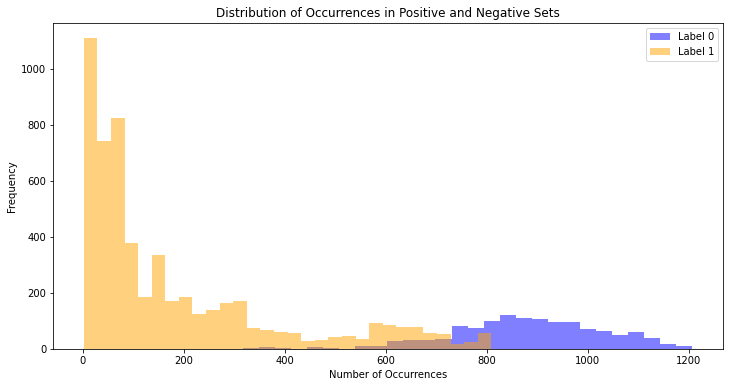

In [4]:
import matplotlib.pyplot as plt

# Plotting the distribution of occurrences in positive and negative sets
plt.figure(figsize=(12, 6))
for lbl, color in zip([0, 1], ['blue', 'orange']):
    subset = merge_occurence[merge_occurence['label'] == lbl]
    plt.hist(subset['count'], bins=30, alpha=0.5, label=f'Label {lbl}', color=color)

plt.title('Distribution of Occurrences in Positive and Negative Sets')
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency')
plt.legend()
plt.show()

in the positive set, most of the proteins appear less than 100 times; while in negative set, proteins appear at least 600 times. this imbalance in data results in challenges in data split. 

## stratified split by combination (label + binned count + cluster)

In [5]:
cluster = pd.read_csv("/Users/yanyz/data/TOUGH-M1/scripts/data/clusterRes_cluster.tsv", sep="\t", header=None)
cluster.columns = ['cluster', 'pdb']
cluster['pdb'] = cluster['pdb'].str[:5]
cluster

,cluster,pdb
0,3la6I_pocket:I,3la6I
1,4wswF_pocket:F,4wswF
2,3g6vA_pocket:A,3g6vA
3,3g6vA_pocket:A,4r8uA
4,2x6yA_pocket:A,2x6yA
...,...,...
7519,1zbdA_pocket:A,4lhwB
7520,4iaqA_pocket:A,4iaqA
7521,2xviC_pocket:C,2xviC
7522,1evhA_pocket:A,1evhA


In [6]:
# number of unique clusters
unique_clusters = cluster['cluster'].unique()
print(f"Number of unique clusters: {len(unique_clusters)}")

Number of unique clusters: 6063


In [7]:
df = merge_occurence.merge(cluster, left_on='pdb', right_on='pdb', how='left')
df

,label,pdb,count,cluster
0,0,3f7tA,1160,3f7tA_pocket:A
1,0,3f8dC,1109,3f8dC_pocket:C
2,0,1jd0A,1197,1jd0A_pocket:A
3,0,5budA,1164,5budA_pocket:A
4,0,1q6iB,1187,1q6iB_pocket:B
...,...,...,...,...
6758,1,5c13E,3,5c13E_pocket:E
6759,1,5cr2B,41,5cr2B_pocket:B
6760,1,5ct2A,11,5ct2A_pocket:A
6761,1,5fcdD,2,5fcdD_pocket:D


In [8]:
# add a column with size of the cluster
df['cluster_size'] = df.groupby('cluster')['pdb'].transform('count')
df

,label,pdb,count,cluster,cluster_size
0,0,3f7tA,1160,3f7tA_pocket:A,1
1,0,3f8dC,1109,3f8dC_pocket:C,1
2,0,1jd0A,1197,1jd0A_pocket:A,1
3,0,5budA,1164,5budA_pocket:A,1
4,0,1q6iB,1187,1q6iB_pocket:B,1
...,...,...,...,...,...
6758,1,5c13E,3,5c13E_pocket:E,1
6759,1,5cr2B,41,5cr2B_pocket:B,1
6760,1,5ct2A,11,5ct2A_pocket:A,1
6761,1,5fcdD,2,5fcdD_pocket:D,1


In [9]:
bins = pd.IntervalIndex.from_tuples([(0, 1), (1, 10), (10, 50)])
df['cluster_size_bin'] = pd.cut(df['cluster_size'], bins)
df['cluster_size_bin']
df

,label,pdb,count,cluster,cluster_size,cluster_size_bin
0,0,3f7tA,1160,3f7tA_pocket:A,1,"(0, 1]"
1,0,3f8dC,1109,3f8dC_pocket:C,1,"(0, 1]"
2,0,1jd0A,1197,1jd0A_pocket:A,1,"(0, 1]"
3,0,5budA,1164,5budA_pocket:A,1,"(0, 1]"
4,0,1q6iB,1187,1q6iB_pocket:B,1,"(0, 1]"
...,...,...,...,...,...,...
6758,1,5c13E,3,5c13E_pocket:E,1,"(0, 1]"
6759,1,5cr2B,41,5cr2B_pocket:B,1,"(0, 1]"
6760,1,5ct2A,11,5ct2A_pocket:A,1,"(0, 1]"
6761,1,5fcdD,2,5fcdD_pocket:D,1,"(0, 1]"


In [10]:
df['count_bin'] = pd.qcut(df['count'], q=4, duplicates='drop')
df['strat_key'] = df['label'].astype(str) + '_' + df['count_bin'].astype(str) + '_' + df['cluster_size_bin'].astype(str)
df

,label,pdb,count,cluster,cluster_size,cluster_size_bin,count_bin,strat_key
0,0,3f7tA,1160,3f7tA_pocket:A,1,"(0, 1]","(587.0, 1207.0]","0_(587.0, 1207.0]_(0, 1]"
1,0,3f8dC,1109,3f8dC_pocket:C,1,"(0, 1]","(587.0, 1207.0]","0_(587.0, 1207.0]_(0, 1]"
2,0,1jd0A,1197,1jd0A_pocket:A,1,"(0, 1]","(587.0, 1207.0]","0_(587.0, 1207.0]_(0, 1]"
3,0,5budA,1164,5budA_pocket:A,1,"(0, 1]","(587.0, 1207.0]","0_(587.0, 1207.0]_(0, 1]"
4,0,1q6iB,1187,1q6iB_pocket:B,1,"(0, 1]","(587.0, 1207.0]","0_(587.0, 1207.0]_(0, 1]"
...,...,...,...,...,...,...,...,...
6758,1,5c13E,3,5c13E_pocket:E,1,"(0, 1]","(1.999, 51.0]","1_(1.999, 51.0]_(0, 1]"
6759,1,5cr2B,41,5cr2B_pocket:B,1,"(0, 1]","(1.999, 51.0]","1_(1.999, 51.0]_(0, 1]"
6760,1,5ct2A,11,5ct2A_pocket:A,1,"(0, 1]","(1.999, 51.0]","1_(1.999, 51.0]_(0, 1]"
6761,1,5fcdD,2,5fcdD_pocket:D,1,"(0, 1]","(1.999, 51.0]","1_(1.999, 51.0]_(0, 1]"


In [16]:
df

,label,pdb,count,cluster,cluster_size,cluster_size_bin,count_bin,strat_key
0,0,3f7tA,1160,3f7tA_pocket:A,1,"(0, 1]","(587.0, 1207.0]","0_(587.0, 1207.0]_(0, 1]"
1,0,3f8dC,1109,3f8dC_pocket:C,1,"(0, 1]","(587.0, 1207.0]","0_(587.0, 1207.0]_(0, 1]"
2,0,1jd0A,1197,1jd0A_pocket:A,1,"(0, 1]","(587.0, 1207.0]","0_(587.0, 1207.0]_(0, 1]"
3,0,5budA,1164,5budA_pocket:A,1,"(0, 1]","(587.0, 1207.0]","0_(587.0, 1207.0]_(0, 1]"
4,0,1q6iB,1187,1q6iB_pocket:B,1,"(0, 1]","(587.0, 1207.0]","0_(587.0, 1207.0]_(0, 1]"
...,...,...,...,...,...,...,...,...
6758,1,5c13E,3,5c13E_pocket:E,1,"(0, 1]","(1.999, 51.0]","1_(1.999, 51.0]_(0, 1]"
6759,1,5cr2B,41,5cr2B_pocket:B,1,"(0, 1]","(1.999, 51.0]","1_(1.999, 51.0]_(0, 1]"
6760,1,5ct2A,11,5ct2A_pocket:A,1,"(0, 1]","(1.999, 51.0]","1_(1.999, 51.0]_(0, 1]"
6761,1,5fcdD,2,5fcdD_pocket:D,1,"(0, 1]","(1.999, 51.0]","1_(1.999, 51.0]_(0, 1]"


In [20]:
# unique values in strat_key
unique_strat_keys = df['strat_key'].unique()
print(f"Number of unique stratification keys: {len(unique_strat_keys)}")

# size of each stratification key
strat_key_counts = df['strat_key'].value_counts()
print("Size of each stratification key:")
print(strat_key_counts)

Number of unique stratification keys: 17
Size of each stratification key:
1_(1.999, 51.0]_(0, 1]        1310
1_(51.0, 150.0]_(0, 1]        1183
0_(587.0, 1207.0]_(0, 1]      1094
1_(150.0, 587.0]_(0, 1]        914
1_(150.0, 587.0]_(1, 10]       637
1_(51.0, 150.0]_(1, 10]        464
1_(1.999, 51.0]_(1, 10]        376
1_(587.0, 1207.0]_(0, 1]       247
1_(587.0, 1207.0]_(1, 10]      203
0_(587.0, 1207.0]_(1, 10]      126
1_(150.0, 587.0]_(10, 50]       99
0_(150.0, 587.0]_(0, 1]         36
1_(51.0, 150.0]_(10, 50]        29
1_(1.999, 51.0]_(10, 50]        21
1_(587.0, 1207.0]_(10, 50]      17
0_(150.0, 587.0]_(1, 10]         4
0_(587.0, 1207.0]_(10, 50]       3
Name: strat_key, dtype: int64


## split using the stratify key

In [21]:
from sklearn.model_selection import train_test_split

# First split: train vs temp (val + test)
train_df, temp_df = train_test_split(
    df,
    test_size=0.6,         # 20% will be split further into val and test
    random_state=42,
    stratify=df['strat_key']  
)

# Second split: validation vs test
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,         # Half of 20% = 10%
    random_state=42,
    stratify=temp_df['strat_key']  # Use same column for stratification
)

In [22]:
val_df

,label,pdb,count,cluster,cluster_size,cluster_size_bin,count_bin,strat_key
411,0,2bnnA,1189,2bnnA_pocket:A,1,"(0, 1]","(587.0, 1207.0]","0_(587.0, 1207.0]_(0, 1]"
2182,1,3pvzC,246,3pvzC_pocket:C,1,"(0, 1]","(150.0, 587.0]","1_(150.0, 587.0]_(0, 1]"
2633,1,5fq0D,140,5fq0D_pocket:D,1,"(0, 1]","(51.0, 150.0]","1_(51.0, 150.0]_(0, 1]"
2042,1,2e5yB,309,2e5yB_pocket:B,1,"(0, 1]","(150.0, 587.0]","1_(150.0, 587.0]_(0, 1]"
3712,1,4yshA,84,3if9A_pocket:A,2,"(1, 10]","(51.0, 150.0]","1_(51.0, 150.0]_(1, 10]"
...,...,...,...,...,...,...,...,...
492,0,3f8fA,939,3f8fA_pocket:A,1,"(0, 1]","(587.0, 1207.0]","0_(587.0, 1207.0]_(0, 1]"
1425,1,4pknE,790,4pknE_pocket:E,3,"(1, 10]","(587.0, 1207.0]","1_(587.0, 1207.0]_(1, 10]"
6003,1,1wmzC,64,1wmzC_pocket:C,1,"(0, 1]","(51.0, 150.0]","1_(51.0, 150.0]_(0, 1]"
5343,1,3f0mA,282,3f0mA_pocket:A,1,"(0, 1]","(150.0, 587.0]","1_(150.0, 587.0]_(0, 1]"


In [23]:
# pdb that are in the train set
train_pdb = train_df['pdb'].unique()
test_pdb = test_df['pdb'].unique()
val_pdb = val_df['pdb'].unique()
print(f"Number of unique pdbs in train set: {len(train_pdb)}")
print(f"Number of unique pdbs in test set: {len(test_pdb)}")
print(f"Number of unique pdbs in val set: {len(val_pdb)}")

Number of unique pdbs in train set: 2705
Number of unique pdbs in test set: 2029
Number of unique pdbs in val set: 2029


In [24]:
train_data = data[(data['pdb1'].isin(train_pdb)) | (data['pdb2'].isin(train_pdb))]
test_data = data[(data['pdb1'].isin(test_pdb)) | (data['pdb2'].isin(test_pdb))]
val_data = data[(data['pdb1'].isin(val_pdb)) | (data['pdb2'].isin(val_pdb))]
print(f"Number of training data: {train_data.shape[0]}")
print(f"Number of testing data: {test_data.shape[0]}")
print(f"Number of validation data: {val_data.shape[0]}")

Number of training data: 670156
Number of testing data: 544611
Number of validation data: 534352


In [26]:
print(f"ratio test/train: {test_data.shape[0] / train_data.shape[0]}")
print(f"ratio val/train: {val_data.shape[0] / train_data.shape[0]}")

ratio test/train: 0.8126630217441909
ratio val/train: 0.7973546457839668


In [ ]:
len(triplets_test) / len(triplets_train)

0.07536390150354912

## generate triplets

In [ ]:
import pandas as pd
from collections import defaultdict

def create_triplets(df):
    """
    df: DataFrame containing columns 'p1', 'p2', and 'label'.
    """
    # Separate positive and negative pairs
    positives = df[df['label'] == 1]
    negatives = df[df['label'] == 0]

    # Create a map from p1 to all dissimilar p3s
    negative_dict = defaultdict(set)
    for _, row in negatives.iterrows():
        negative_dict[row['pdb1']].add(row['pdb2'])

    triplets = []

    for _, row in positives.iterrows():
        p1, p2 = row['pdb1'], row['pdb2']
        if p1 in negative_dict and negative_dict[p1]:
            for p3 in negative_dict[p1]:
                triplets.append((p1, p2, p3))
    
    return triplets

triplets_train = create_triplets(train_data)
with open('triplets_train.txt', 'w') as f:
    for triplet in triplets_train:
        f.write(f"{triplet[0]} {triplet[1]} {triplet[2]}\n")

triplets_test = create_triplets(test_data)
with open('triplets_test.txt', 'w') as f:
    for triplet in triplets_test:
        f.write(f"{triplet[0]} {triplet[1]} {triplet[2]}\n")

triplets_val = create_triplets(val_data)
with open('triplets_val.txt', 'w') as f:
    for triplet in triplets_val:
        f.write(f"{triplet[0]} {triplet[1]} {triplet[2]}\n")

print(f"Number of triplets in train set: {len(triplets_train)}")
print(f"Number of triplets in test set: {len(triplets_test)}")
print(f"Number of triplets in val set: {len(triplets_val)}")


# split strategy 4

## generate triplets

In [1]:
# load data
import pandas as pd

colnames=['pdb1', 'pdb2', 'seq_id_prot', 'tm-score_prot', 'tanimoto_coefficient_lig'] 
positive = pd.read_csv('/Users/yanyz/data/TOUGH-M1/TOUGH-M1_positive.list', sep=' ', header=None, names=colnames)
negative = pd.read_csv('/Users/yanyz/data/TOUGH-M1/TOUGH-M1_negative.list', sep=' ', header=None, names=colnames)
positive['label'] = 1
negative['label'] = 0
data = pd.concat([positive, negative], axis=0)
data

,pdb1,pdb2,seq_id_prot,tm-score_prot,tanimoto_coefficient_lig,label
0,1lkxD,2qenA,0.202,0.33914,1.000000,1
1,1lkxD,3zl8A,0.191,0.31224,1.000000,1
2,1lkxD,4dz6A,0.203,0.33353,1.000000,1
3,1lkxD,2j9dJ,0.216,0.37152,1.000000,1
4,1lkxD,4yj1A,0.151,0.27935,1.000000,1
...,...,...,...,...,...,...
556805,4rwaB,2vu9A,0.185,0.26473,0.070312,0
556806,4rwaB,1w9xA,0.208,0.26563,0.057554,0
556807,4qqcA,2vu9A,0.168,0.32373,0.080000,0
556808,4qqcA,1w9xA,0.202,0.31928,0.050725,0


In [ ]:
import pandas as pd
from collections import defaultdict

def create_triplets(df):
    """
    df: DataFrame containing columns 'p1', 'p2', and 'label'.
    """
    # Separate positive and negative pairs
    positives = df[df['label'] == 1]
    negatives = df[df['label'] == 0]

    # Create a map from p1 to all dissimilar p3s
    negative_dict = defaultdict(set)
    for _, row in negatives.iterrows():
        negative_dict[row['pdb1']].add(row['pdb2'])

    triplets = []

    for _, row in positives.iterrows():
        p1, p2 = row['pdb1'], row['pdb2']
        if p1 in negative_dict and negative_dict[p1]:
            for p3 in negative_dict[p1]:
                triplets.append((p1, p2, p3))
    
    return triplets

triplets_all = create_triplets(data)
with open('triplets_all.txt', 'w') as f:
    for triplet in triplets_all:
        f.write(f"{triplet[0]} {triplet[1]} {triplet[2]}\n")

print(f"Number of all possible triplets: {len(triplets_all)}")


Number of triplets in train set: 3569308


## load triplets_all data

In [1]:
import pandas as pd

triplets_all_df = pd.read_csv('triplets_all.txt', sep=' ', header=None, names=['p1', 'p2', 'p3'])
triplets_all_df

FileNotFoundError: [Errno 2] No such file or directory: 'triplets_all.txt'

## occurence of each protein in positive and negative sets

In [ ]:
occurrence_pdb1 = data.groupby('label')['pdb1'].value_counts().reset_index(name='count')
occurrence_pdb1.columns = ['label', 'pdb', 'count']
occurrence_pdb2 = data.groupby('label')['pdb2'].value_counts().reset_index(name='count')
occurrence_pdb2.columns = ['label', 'pdb', 'count']
merge_occurence = pd.merge(occurrence_pdb1, occurrence_pdb2, on=['label', 'pdb'], suffixes=('_pdb1', '_pdb2'))
merge_occurence = merge_occurence.fillna(0)
merge_occurence['count'] = merge_occurence['count_pdb1'] + merge_occurence['count_pdb2']
merge_occurence.drop(columns=['count_pdb1', 'count_pdb2'], inplace=True)
merge_occurence

,label,pdb,count
0,0,3f7tA,1160
1,0,3f8dC,1109
2,0,1jd0A,1197
3,0,5budA,1164
4,0,1q6iB,1187
...,...,...,...
6758,1,5c13E,3
6759,1,5cr2B,41
6760,1,5ct2A,11
6761,1,5fcdD,2


In [ ]:
7524 - 6763

761

761 proteins are not in positive or negative sets, although they are in the TOUGH-M1 set?!

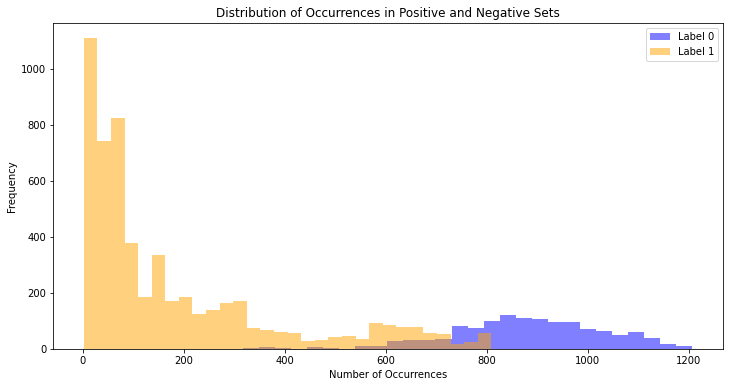

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of occurrences in positive and negative sets
plt.figure(figsize=(12, 6))
for lbl, color in zip([0, 1], ['blue', 'orange']):
    subset = merge_occurence[merge_occurence['label'] == lbl]
    plt.hist(subset['count'], bins=30, alpha=0.5, label=f'Label {lbl}', color=color)

plt.title('Distribution of Occurrences in Positive and Negative Sets')
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency')
plt.legend()
plt.show()

in the positive set, most of the proteins appear less than 100 times; while in negative set, proteins appear at least 600 times. this imbalance in data results in challenges in data split. 

## stratified split by combination (label + binned count + cluster)

In [ ]:
cluster = pd.read_csv("/Users/yanyz/data/TOUGH-M1/scripts/data/clusterRes_cluster.tsv", sep="\t", header=None)
cluster.columns = ['cluster', 'pdb']
cluster['pdb'] = cluster['pdb'].str[:5]
cluster

,cluster,pdb
0,3la6I_pocket:I,3la6I
1,4wswF_pocket:F,4wswF
2,3g6vA_pocket:A,3g6vA
3,3g6vA_pocket:A,4r8uA
4,2x6yA_pocket:A,2x6yA
...,...,...
7519,1zbdA_pocket:A,4lhwB
7520,4iaqA_pocket:A,4iaqA
7521,2xviC_pocket:C,2xviC
7522,1evhA_pocket:A,1evhA


In [ ]:
# number of unique clusters
unique_clusters = cluster['cluster'].unique()
print(f"Number of unique clusters: {len(unique_clusters)}")

Number of unique clusters: 6063


In [ ]:
df = merge_occurence.merge(cluster, left_on='pdb', right_on='pdb', how='left')
df

,label,pdb,count,cluster
0,0,3f7tA,1160,3f7tA_pocket:A
1,0,3f8dC,1109,3f8dC_pocket:C
2,0,1jd0A,1197,1jd0A_pocket:A
3,0,5budA,1164,5budA_pocket:A
4,0,1q6iB,1187,1q6iB_pocket:B
...,...,...,...,...
6758,1,5c13E,3,5c13E_pocket:E
6759,1,5cr2B,41,5cr2B_pocket:B
6760,1,5ct2A,11,5ct2A_pocket:A
6761,1,5fcdD,2,5fcdD_pocket:D


In [ ]:
# add a column with size of the cluster
df['cluster_size'] = df.groupby('cluster')['pdb'].transform('count')
df

,label,pdb,count,cluster,cluster_size
0,0,3f7tA,1160,3f7tA_pocket:A,1
1,0,3f8dC,1109,3f8dC_pocket:C,1
2,0,1jd0A,1197,1jd0A_pocket:A,1
3,0,5budA,1164,5budA_pocket:A,1
4,0,1q6iB,1187,1q6iB_pocket:B,1
...,...,...,...,...,...
6758,1,5c13E,3,5c13E_pocket:E,1
6759,1,5cr2B,41,5cr2B_pocket:B,1
6760,1,5ct2A,11,5ct2A_pocket:A,1
6761,1,5fcdD,2,5fcdD_pocket:D,1


In [ ]:
bins = pd.IntervalIndex.from_tuples([(0, 1), (1, 10), (10, 50)])
df['cluster_size_bin'] = pd.cut(df['cluster_size'], bins)
df['cluster_size_bin']
df

,label,pdb,count,cluster,cluster_size,cluster_size_bin
0,0,3f7tA,1160,3f7tA_pocket:A,1,"(0, 1]"
1,0,3f8dC,1109,3f8dC_pocket:C,1,"(0, 1]"
2,0,1jd0A,1197,1jd0A_pocket:A,1,"(0, 1]"
3,0,5budA,1164,5budA_pocket:A,1,"(0, 1]"
4,0,1q6iB,1187,1q6iB_pocket:B,1,"(0, 1]"
...,...,...,...,...,...,...
6758,1,5c13E,3,5c13E_pocket:E,1,"(0, 1]"
6759,1,5cr2B,41,5cr2B_pocket:B,1,"(0, 1]"
6760,1,5ct2A,11,5ct2A_pocket:A,1,"(0, 1]"
6761,1,5fcdD,2,5fcdD_pocket:D,1,"(0, 1]"


In [ ]:
df['count_bin'] = pd.qcut(df['count'], q=4, duplicates='drop')
df['strat_key'] = df['label'].astype(str) + '_' + df['count_bin'].astype(str) + '_' + df['cluster_size_bin'].astype(str)
df

,label,pdb,count,cluster,cluster_size,cluster_size_bin,count_bin,strat_key
0,0,3f7tA,1160,3f7tA_pocket:A,1,"(0, 1]","(587.0, 1207.0]","0_(587.0, 1207.0]_(0, 1]"
1,0,3f8dC,1109,3f8dC_pocket:C,1,"(0, 1]","(587.0, 1207.0]","0_(587.0, 1207.0]_(0, 1]"
2,0,1jd0A,1197,1jd0A_pocket:A,1,"(0, 1]","(587.0, 1207.0]","0_(587.0, 1207.0]_(0, 1]"
3,0,5budA,1164,5budA_pocket:A,1,"(0, 1]","(587.0, 1207.0]","0_(587.0, 1207.0]_(0, 1]"
4,0,1q6iB,1187,1q6iB_pocket:B,1,"(0, 1]","(587.0, 1207.0]","0_(587.0, 1207.0]_(0, 1]"
...,...,...,...,...,...,...,...,...
6758,1,5c13E,3,5c13E_pocket:E,1,"(0, 1]","(1.999, 51.0]","1_(1.999, 51.0]_(0, 1]"
6759,1,5cr2B,41,5cr2B_pocket:B,1,"(0, 1]","(1.999, 51.0]","1_(1.999, 51.0]_(0, 1]"
6760,1,5ct2A,11,5ct2A_pocket:A,1,"(0, 1]","(1.999, 51.0]","1_(1.999, 51.0]_(0, 1]"
6761,1,5fcdD,2,5fcdD_pocket:D,1,"(0, 1]","(1.999, 51.0]","1_(1.999, 51.0]_(0, 1]"


In [ ]:
df

,label,pdb,count,cluster,cluster_size,cluster_size_bin,count_bin,strat_key
0,0,3f7tA,1160,3f7tA_pocket:A,1,"(0, 1]","(587.0, 1207.0]","0_(587.0, 1207.0]_(0, 1]"
1,0,3f8dC,1109,3f8dC_pocket:C,1,"(0, 1]","(587.0, 1207.0]","0_(587.0, 1207.0]_(0, 1]"
2,0,1jd0A,1197,1jd0A_pocket:A,1,"(0, 1]","(587.0, 1207.0]","0_(587.0, 1207.0]_(0, 1]"
3,0,5budA,1164,5budA_pocket:A,1,"(0, 1]","(587.0, 1207.0]","0_(587.0, 1207.0]_(0, 1]"
4,0,1q6iB,1187,1q6iB_pocket:B,1,"(0, 1]","(587.0, 1207.0]","0_(587.0, 1207.0]_(0, 1]"
...,...,...,...,...,...,...,...,...
6758,1,5c13E,3,5c13E_pocket:E,1,"(0, 1]","(1.999, 51.0]","1_(1.999, 51.0]_(0, 1]"
6759,1,5cr2B,41,5cr2B_pocket:B,1,"(0, 1]","(1.999, 51.0]","1_(1.999, 51.0]_(0, 1]"
6760,1,5ct2A,11,5ct2A_pocket:A,1,"(0, 1]","(1.999, 51.0]","1_(1.999, 51.0]_(0, 1]"
6761,1,5fcdD,2,5fcdD_pocket:D,1,"(0, 1]","(1.999, 51.0]","1_(1.999, 51.0]_(0, 1]"


In [ ]:
# unique values in strat_key
unique_strat_keys = df['strat_key'].unique()
print(f"Number of unique stratification keys: {len(unique_strat_keys)}")

# size of each stratification key
strat_key_counts = df['strat_key'].value_counts()
print("Size of each stratification key:")
print(strat_key_counts)

Number of unique stratification keys: 17
Size of each stratification key:
1_(1.999, 51.0]_(0, 1]        1310
1_(51.0, 150.0]_(0, 1]        1183
0_(587.0, 1207.0]_(0, 1]      1094
1_(150.0, 587.0]_(0, 1]        914
1_(150.0, 587.0]_(1, 10]       637
1_(51.0, 150.0]_(1, 10]        464
1_(1.999, 51.0]_(1, 10]        376
1_(587.0, 1207.0]_(0, 1]       247
1_(587.0, 1207.0]_(1, 10]      203
0_(587.0, 1207.0]_(1, 10]      126
1_(150.0, 587.0]_(10, 50]       99
0_(150.0, 587.0]_(0, 1]         36
1_(51.0, 150.0]_(10, 50]        29
1_(1.999, 51.0]_(10, 50]        21
1_(587.0, 1207.0]_(10, 50]      17
0_(150.0, 587.0]_(1, 10]         4
0_(587.0, 1207.0]_(10, 50]       3
Name: strat_key, dtype: int64


## split using the stratify key

In [ ]:
from sklearn.model_selection import train_test_split

# First split: train vs temp (val + test)
train_df, temp_df = train_test_split(
    df,
    test_size=0.6,         # 20% will be split further into val and test
    random_state=42,
    stratify=df['strat_key']  
)

# Second split: validation vs test
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,         # Half of 20% = 10%
    random_state=42,
    stratify=temp_df['strat_key']  # Use same column for stratification
)

In [ ]:
val_df

,label,pdb,count,cluster,cluster_size,cluster_size_bin,count_bin,strat_key
411,0,2bnnA,1189,2bnnA_pocket:A,1,"(0, 1]","(587.0, 1207.0]","0_(587.0, 1207.0]_(0, 1]"
2182,1,3pvzC,246,3pvzC_pocket:C,1,"(0, 1]","(150.0, 587.0]","1_(150.0, 587.0]_(0, 1]"
2633,1,5fq0D,140,5fq0D_pocket:D,1,"(0, 1]","(51.0, 150.0]","1_(51.0, 150.0]_(0, 1]"
2042,1,2e5yB,309,2e5yB_pocket:B,1,"(0, 1]","(150.0, 587.0]","1_(150.0, 587.0]_(0, 1]"
3712,1,4yshA,84,3if9A_pocket:A,2,"(1, 10]","(51.0, 150.0]","1_(51.0, 150.0]_(1, 10]"
...,...,...,...,...,...,...,...,...
492,0,3f8fA,939,3f8fA_pocket:A,1,"(0, 1]","(587.0, 1207.0]","0_(587.0, 1207.0]_(0, 1]"
1425,1,4pknE,790,4pknE_pocket:E,3,"(1, 10]","(587.0, 1207.0]","1_(587.0, 1207.0]_(1, 10]"
6003,1,1wmzC,64,1wmzC_pocket:C,1,"(0, 1]","(51.0, 150.0]","1_(51.0, 150.0]_(0, 1]"
5343,1,3f0mA,282,3f0mA_pocket:A,1,"(0, 1]","(150.0, 587.0]","1_(150.0, 587.0]_(0, 1]"


In [ ]:
# pdb that are in the train set
train_pdb = train_df['pdb'].unique()
test_pdb = test_df['pdb'].unique()
val_pdb = val_df['pdb'].unique()
print(f"Number of unique pdbs in train set: {len(train_pdb)}")
print(f"Number of unique pdbs in test set: {len(test_pdb)}")
print(f"Number of unique pdbs in val set: {len(val_pdb)}")

Number of unique pdbs in train set: 2705
Number of unique pdbs in test set: 2029
Number of unique pdbs in val set: 2029


In [ ]:
train_data = data[(data['pdb1'].isin(train_pdb)) | (data['pdb2'].isin(train_pdb))]
test_data = data[(data['pdb1'].isin(test_pdb)) | (data['pdb2'].isin(test_pdb))]
val_data = data[(data['pdb1'].isin(val_pdb)) | (data['pdb2'].isin(val_pdb))]
print(f"Number of training data: {train_data.shape[0]}")
print(f"Number of testing data: {test_data.shape[0]}")
print(f"Number of validation data: {val_data.shape[0]}")

Number of training data: 670156
Number of testing data: 544611
Number of validation data: 534352


In [ ]:
print(f"ratio test/train: {test_data.shape[0] / train_data.shape[0]}")
print(f"ratio val/train: {val_data.shape[0] / train_data.shape[0]}")

ratio test/train: 0.8126630217441909
ratio val/train: 0.7973546457839668


In [ ]:
len(triplets_test) / len(triplets_train)

0.07536390150354912